# **Investment Strategies**

### **Data Viz**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ibov = pd.read_csv('BVSP.csv', parse_dates=['Date'], index_col='Date')
ibov

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400
...,...,...,...,...,...,...
2023-01-16,110908.0,110908.0,108753.0,109213.0,109213.0,12512400
2023-01-17,109214.0,111577.0,109214.0,111439.0,111439.0,14363200
2023-01-18,111442.0,113306.0,111441.0,112452.0,112452.0,14128600


In [3]:
# We are only interested in the 'close' prices

df = ibov['Close'].to_frame()
df

,Close
Date,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0
...,...
2023-01-16,109213.0
2023-01-17,111439.0
2023-01-18,112452.0


In [5]:
df.describe()

,Close
count,3231.000000
mean,75040.362426
std,23813.636210
min,37497.000000
25%,55539.500000
50%,66341.000000
75%,97672.000000
max,130776.000000


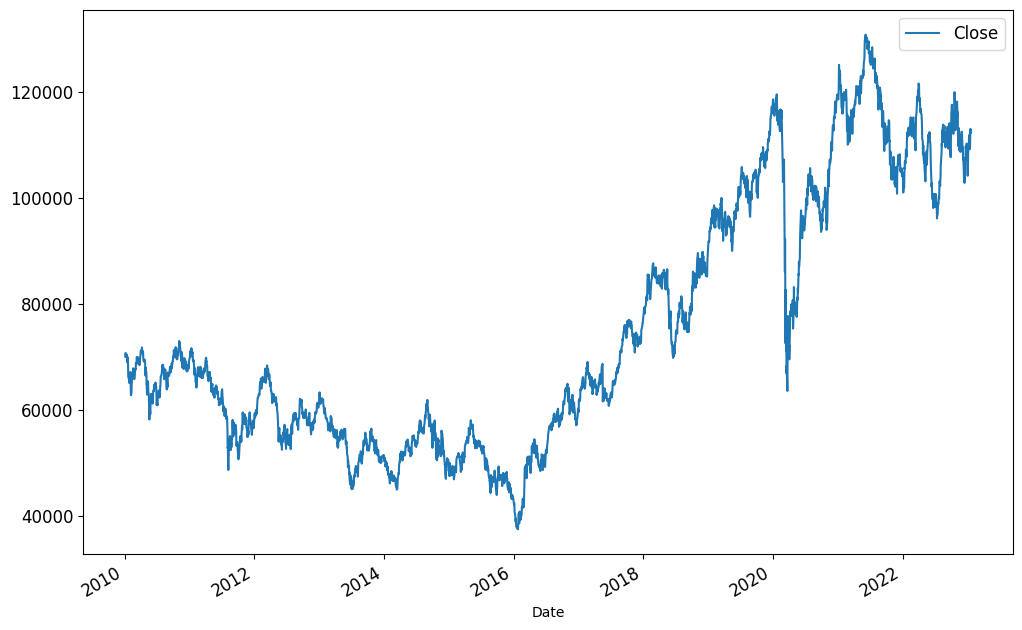

In [6]:
df.plot(figsize=(12,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [7]:
df['Return'] = df.pct_change()
df

,Close,Return
Date,,
2010-01-04,70045.0,NaN
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
...,...,...
2023-01-16,109213.0,-0.016418
2023-01-17,111439.0,0.020382
2023-01-18,112452.0,0.009090


In [8]:
df.isna().sum()

Close     0
Return    1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.rename(columns={'Close': 'Ibov_Close', 'Return': 'Ibov_Return'}, inplace=True)

In [11]:
df

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2023-01-16,109213.0,-0.016418
2023-01-17,111439.0,0.020382
2023-01-18,112452.0,0.009090


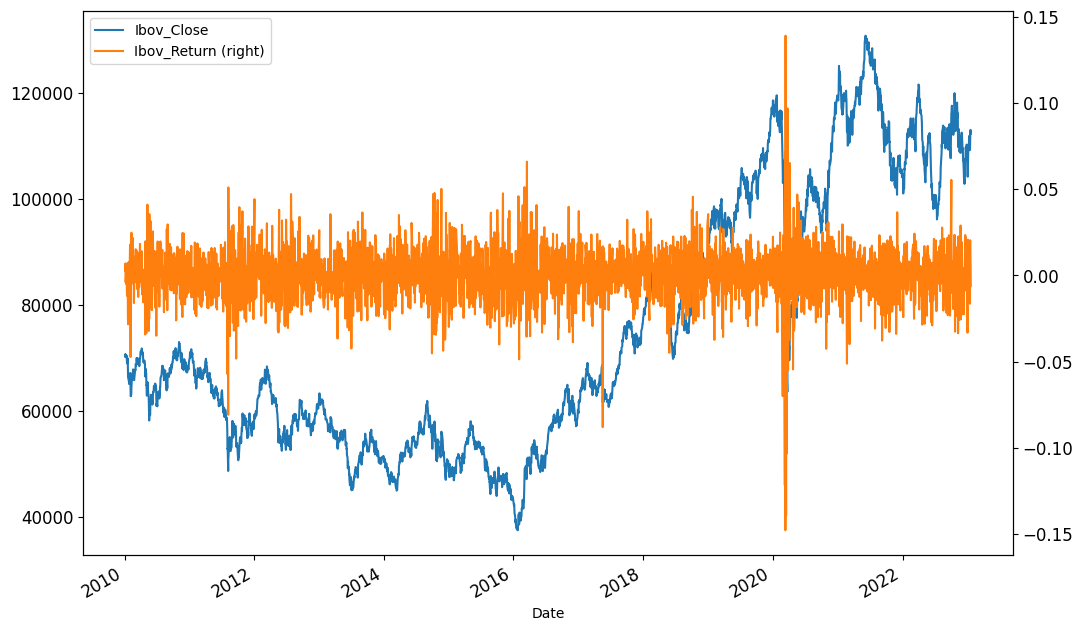

In [12]:
df.plot(figsize=(12,8), secondary_y= 'Ibov_Return', mark_right=True, fontsize=12)
plt.show()

The big spikes in Ibov_Return was caused by the pandemic.

## **Simple Momentum Strategy**

__Positions__:

+1: Investing in Ibov (__long__ position) <br>
-1: Short Selling Ibov (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

__Buy and Hold__ (Basic Strategy - passive): Initially Investing into Ibov and do nothing (Position: +1 on any given day)

__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into Ibov tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ Ibov tomorrow if today´s return was __negative__

__We gonna choose the period after the 2008 financial crisis and the Covid-19 pandemic for this strategy.__

In [13]:
df1 = df.loc['2010-01-01': '2019-12-31', 'Ibov_Close': 'Ibov_Return']

In [14]:
df1

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2019-12-20,115121.0,-0.000087
2019-12-23,115863.0,0.006445
2019-12-26,117203.0,0.011565


In [15]:
# Positions based on the signs of the 'Ibov_Return'

df1['Position'] = np.sign(df1['Ibov_Return'])

In [16]:
df1

,Ibov_Close,Ibov_Return,Position
Date,,,
2010-01-05,70240.0,0.002784,1.0
2010-01-06,70729.0,0.006962,1.0
2010-01-07,70451.0,-0.003930,-1.0
2010-01-08,70263.0,-0.002669,-1.0
2010-01-11,70433.0,0.002419,1.0
...,...,...,...
2019-12-20,115121.0,-0.000087,-1.0
2019-12-23,115863.0,0.006445,1.0
2019-12-26,117203.0,0.011565,1.0


In [17]:
# Considering that if the index drops we sell the stock the next day and that if the index rises we invest in more stocks,
# we will create a column that evaluates how much return we will have with this strategy

df1['Strategy_Return'] = df1['Position'].shift() * df1['Ibov_Return']

In [18]:
df1

,Ibov_Close,Ibov_Return,Position,Strategy_Return
Date,,,,
2010-01-05,70240.0,0.002784,1.0,NaN
2010-01-06,70729.0,0.006962,1.0,0.006962
2010-01-07,70451.0,-0.003930,-1.0,-0.003930
2010-01-08,70263.0,-0.002669,-1.0,0.002669
2010-01-11,70433.0,0.002419,1.0,-0.002419
...,...,...,...,...
2019-12-20,115121.0,-0.000087,-1.0,-0.000087
2019-12-23,115863.0,0.006445,1.0,-0.006445
2019-12-26,117203.0,0.011565,1.0,0.011565


In [19]:
df1.Strategy_Return.add(1, fill_value=0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    1.006962
2010-01-07    1.003004
2010-01-08    1.005681
2010-01-11    1.003247
                ...   
2019-12-20    0.961029
2019-12-23    0.954835
2019-12-26    0.965878
2019-12-27    0.960364
2019-12-30    0.965062
Name: Strategy_Return, Length: 2470, dtype: float64

In [20]:
# Evaluating the prices of Ibov with the returns of our strategy
# In Finance cumprod() is helpful to calculate the Value of Investments over time given the returns

df1['Strategy'] = df1.Strategy_Return.add(1, fill_value=0).cumprod() * df1.iloc[0,0]

In [21]:
df1

,Ibov_Close,Ibov_Return,Position,Strategy_Return,Strategy
Date,,,,,
2010-01-05,70240.0,0.002784,1.0,NaN,70240.000000
2010-01-06,70729.0,0.006962,1.0,0.006962,70729.000000
2010-01-07,70451.0,-0.003930,-1.0,-0.003930,70451.000000
2010-01-08,70263.0,-0.002669,-1.0,0.002669,70639.000000
2010-01-11,70433.0,0.002419,1.0,-0.002419,70468.090275
...,...,...,...,...,...
2019-12-20,115121.0,-0.000087,-1.0,-0.000087,67502.666473
2019-12-23,115863.0,0.006445,1.0,-0.006445,67067.585310
2019-12-26,117203.0,0.011565,1.0,0.011565,67843.247638


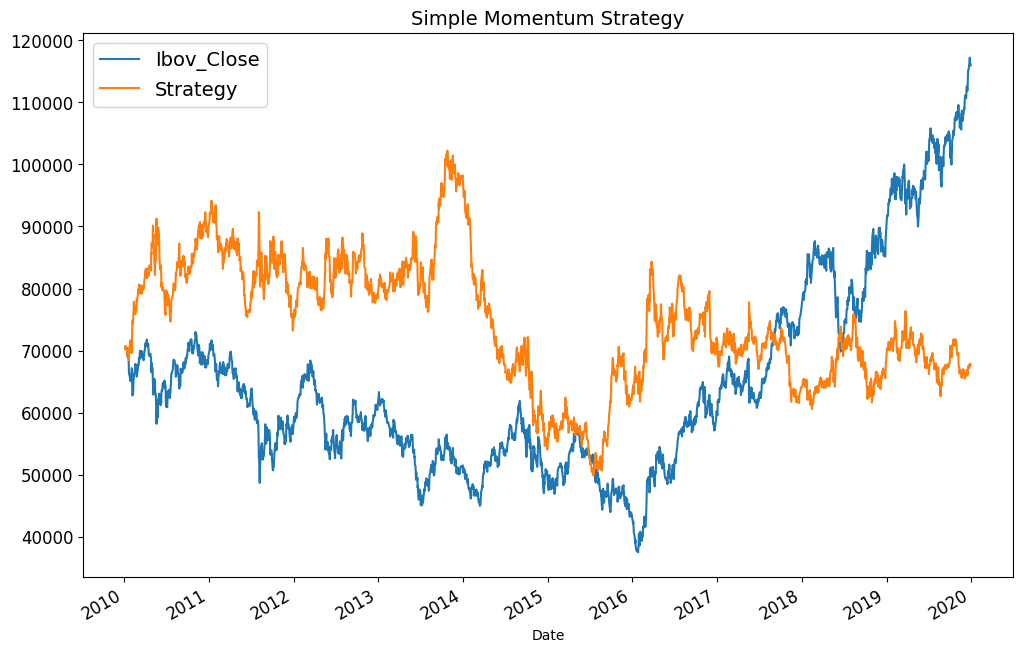

In [22]:
df1[['Ibov_Close', 'Strategy']].plot(figsize = (12,8), fontsize = 12)
plt.title('Simple Momentum Strategy', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

This graph we can observe that initially our strategy works but in the long run our strategy is underperforming.

In [24]:
# Evaluating the risk and return for both strategies

def rnr(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Return'] = summary['mean'] * 252 #We have, approximately, 252 trading days in a year
    summary['Risk'] = summary['std'] * np.sqrt(252)
    summary.drop(columns=['mean', 'std'], inplace=True)
    return summary

In [25]:
rnr(df1[['Ibov_Return', 'Strategy_Return']])

,Return,Risk
Ibov_Return,0.076378,0.223283
Strategy_Return,0.021261,0.223286


The risk is almost the same but our return clearly underperforms the Ibovespa index.

## **Simple Contrarian Strategy**

__Strategies__:

__Buy and Hold__ (Basic Strategy): Initially Investing into Ibov and do nothing (Position: +1 on all days)

__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ Ibov tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into Ibov tomorrow if today´s return was __negative__

__Again, we gonna choose the period after the 2008 financial crisis and the Covid-19 pandemic for this strategy.__

In [26]:
df2 = df.loc['2010-01-01': '2020-03-31', 'Ibov_Close': 'Ibov_Return']
df2

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2020-03-25,74956.0,0.074962
2020-03-26,77710.0,0.036742
2020-03-27,73429.0,-0.055089
